# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.440128e+01     1.517027e+01
 * time: 0.002880096435546875
     1     6.199743e+01     9.372306e+00
 * time: 0.008554220199584961
     2     5.697427e+01     1.210611e+01
 * time: 0.02156519889831543
     3     4.078114e+01     8.001023e+00
 * time: 0.039855003356933594
     4     3.157905e+01     7.293621e+00
 * time: 0.05774116516113281
     5     2.791226e+01     6.597243e+00
 * time: 0.07317399978637695
     6     1.361716e+01     2.937466e+00
 * time: 0.08832621574401855
     7     9.839198e+00     1.969599e+00
 * time: 0.10110116004943848
     8     9.142676e+00     2.318200e+00
 * time: 0.11394810676574707
     9     8.667955e+00     1.504166e+00
 * time: 0.12666606903076172
    10     8.112026e+00     2.647600e+00
 * time: 0.17719221115112305
    11     7.629195e+00     2.080945e+00
 * time: 0.1880030632019043
    12     7.136795e+00     1.687350e+00
 * time: 0.19937705993652344
    13     6.707647e+00     1.460972e+00
 * tim

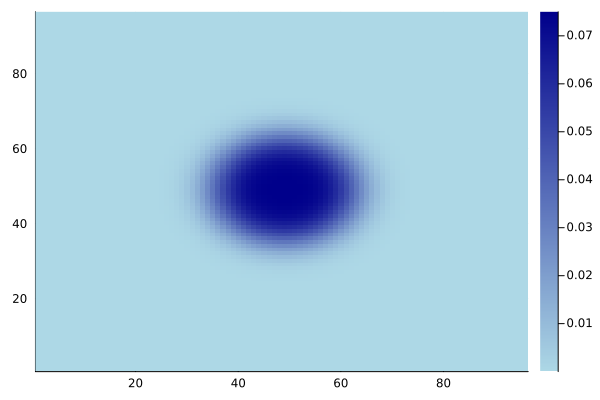

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)